# Error bars with various plotting commands

In [1]:
import proplot as plot
import numpy as np
import pandas as pd

/Users/jacobkritikos/opt/anaconda3/lib/python3.9/site-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [4]:
plot.rc['title.loc'] = 'uc'
plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
state = np.random.RandomState(51423)
data = state.rand(20, 8).cumsum(axis=0).cumsum(axis=1)[:, ::-1] \
    + 20*state.normal(size=(20, 8)) + 30

In [54]:
print(data.shape)

(20, 8)


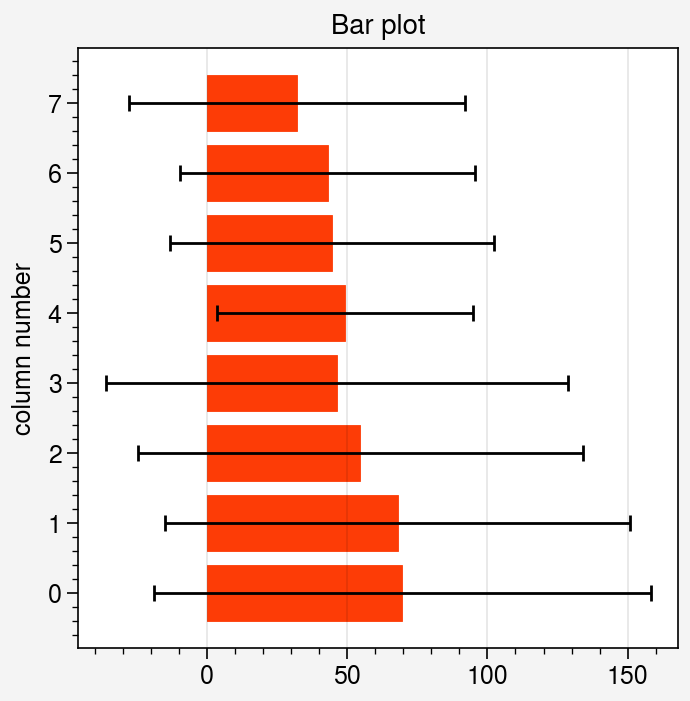

In [53]:
fig, ax = plot.subplots(axwidth=3, share=0)
# Asking add_errorbars to calculate bars
obj = ax.barh(data, color='red orange', means=True)
ax.format(title='Column statistics')
ax.format(ylabel='column number', title='Bar plot', ygrid=False)
plot.rc.reset()

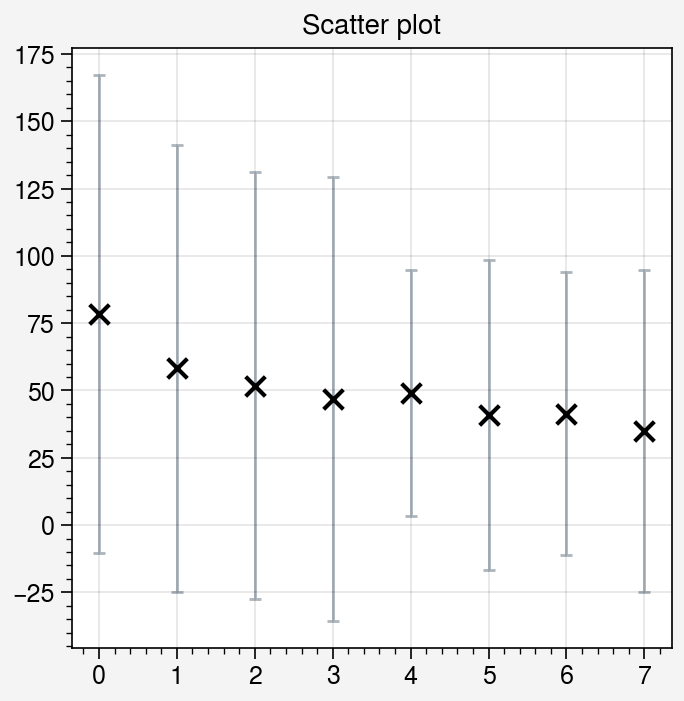

In [48]:
fig, ax = plot.subplots(axwidth=3, share=0)
# Showing a standard deviation range instead of percentile range
ax.scatter(data, color='k', marker='x', markersize=50, barcolor='gray5',
           medians=True, barstd=True, barzorder=0, boxes=False, capsize=2)
ax.format(title='Scatter plot')
plot.rc.reset()

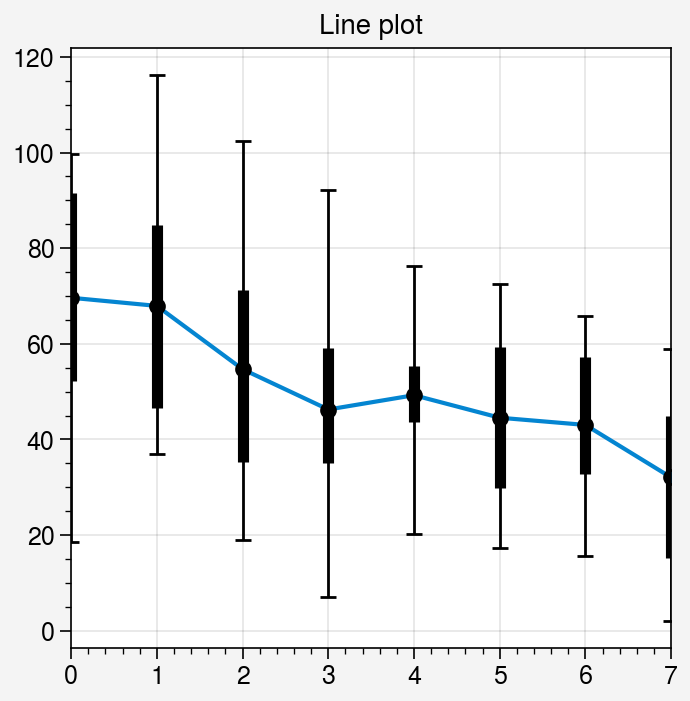

In [49]:
fig, ax = plot.subplots(axwidth=3, share=0)
# Supplying error bar data manually
boxdata = np.percentile(data, (25, 75), axis=0)
bardata = np.percentile(data, (5, 95), axis=0)
ax.plot(data.mean(axis=0), boxes=False, marker='o', markersize=5,
        edgecolor='k', color='cerulean', boxdata=boxdata, bardata=bardata)
ax.format(title='Line plot')
plot.rc.reset()

# Reference
- https://proplot.readthedocs.io/en/v0.2.6/1dplots.html#On-the-fly-error-bars
